# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [3]:
import numpy
import matplotlib.pyplot as plt

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/lena.png` and show it:

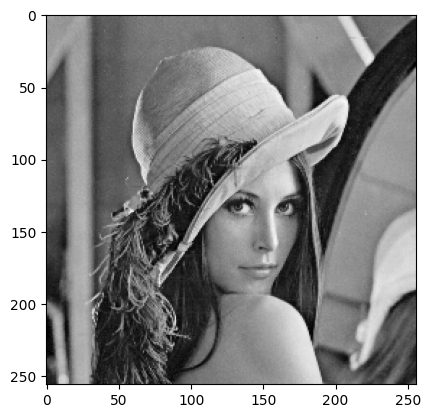

In [4]:
img = plt.imread('data/lena.png')
plt.imshow(img, 'gray')

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [5]:
img.shape

(256, 256)

In [6]:
def meanfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        if n <= p[0] < img.shape[0]- n and n <= p[1] < img.shape[1]- n:
            neighborhood_sum = 0
            for q in numpy.ndindex(size, size):
                neighborhood_sum += img[p[0] + q[0] - n, p[1] + q[1] - n]
            result[p[0],p[1]] = neighborhood_sum / size**2
    return result

**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

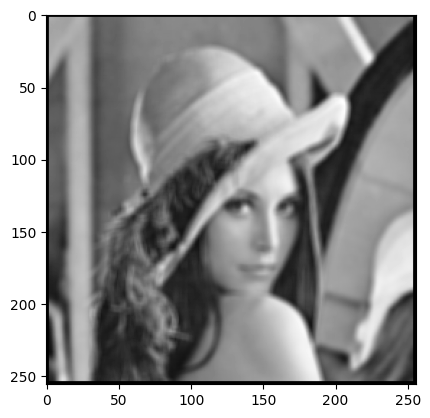

In [17]:
img3 = meanfilter(img, 5)
plt.imshow(img3, 'gray')

**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/lena_meanfilter5.png`:

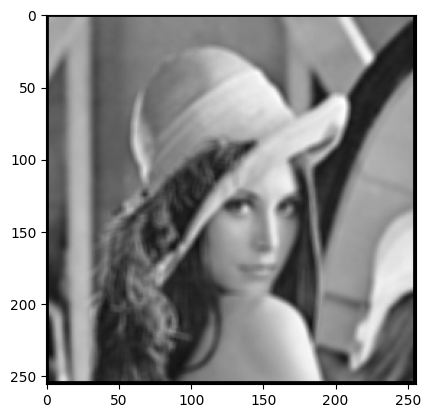

In [19]:
img_lena5 = plt.imread('data/lena_meanfilter5.png')
plt.imshow(img_lena5, 'gray')

assert numpy.allclose(img3, img_lena5, atol=1/255)

---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [9]:
def medianfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        neighborhood_med = 0
        l=list()
        if n <= p[0] < img.shape[0]- n and n <= p[1] < img.shape[1]- n:
            for q in numpy.ndindex(size, size):
                neighborhood_int = img[p[0] + q[0] - n, p[1] + q[1] - n]
                l.append(neighborhood_int)
                l.sort()
                median = l[len(l) // 2]
                neighborhood_med = median
            result[p[0],p[1]] = neighborhood_med
    return result

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

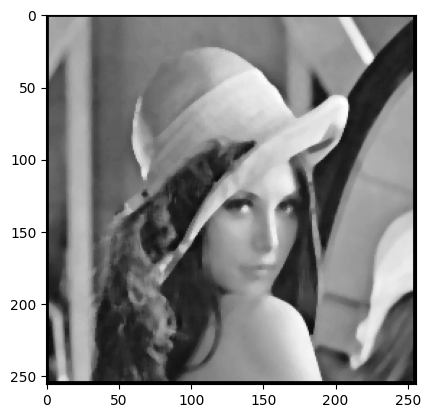

In [10]:
img4 = medianfilter(img, 5)
plt.imshow(img4, 'gray')

Then, compare your result for filter size `5` with the correct result image `data/lena_medianfilter5.png`:

In [11]:
img_lena_median5 = plt.imread('data/lena_medianfilter5.png')

assert numpy.allclose(img4,img_lena_median5, atol=1/255)

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

In [12]:
import scipy.ndimage

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

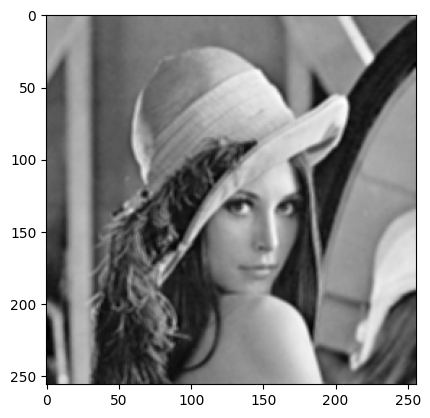

In [13]:
img_mean = scipy.ndimage.uniform_filter(img, 3)
plt.imshow(img_mean, 'gray')

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

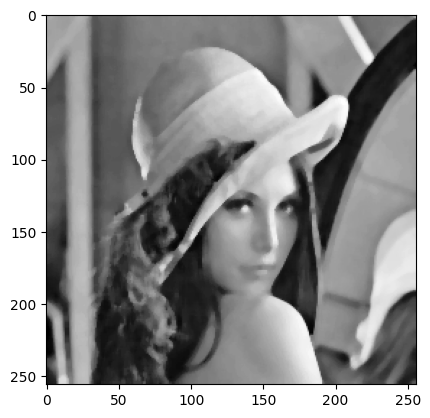

In [14]:
img_median = scipy.ndimage.median_filter(img, 5)
plt.imshow(img_median, 'gray')

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

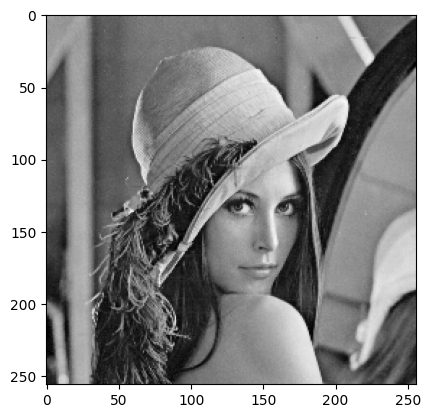

In [20]:
img_gauss = scipy.ndimage.gaussian_filter(img, 0.1)
plt.imshow(img_gauss, 'gray')

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

Images that were filtered using the defined function have a black edge around the image (as all pixels which were not covered by the entire filter mask were replaced with 0). The built in function deals differently with the edges which is why there is no black edge around the image.

SyntaxError: invalid syntax (504600268.py, line 1)

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [ ]:
def fastfilter(img, size):
    # write your code here

SyntaxError: incomplete input (1741712700.py, line 2)

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation: